<a href="https://colab.research.google.com/github/Buse-cetin/Topic_Modelling/blob/main/LSA_Topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

stop_words=nltk.corpus.stopwords.words('turkish')
new_stopwords = ['istanbul','gtgtb','imamoğlu','istanbulbld','beyazmasa','belediye','imamoglu','ekrem',"istanbulsikayet",'istanbul_trafik',"istanbultrafik","ibb_ulasim","iett","beyazmasa","ibbulaştırma","ibbbeyazmasa"]
stop_words.extend(new_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/unwanted_clean.csv', on_bad_lines='skip')
df=pd.DataFrame(data)
reviews=data[['tweet']]


def clean_text(reviews):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(reviews)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text


In [ ]:
print(data)

       Unnamed: 0                                              tweet
0               0  dakikadan fazladır taksi dksı görünen otobüsü ...
1               1  olimpiyat cadde üzeri pendik buraya araç park ...
2               2  parklarda kontrol bakımları aksatarak canlarla...
3               3  parklarda kontrol bakımları aksatarak canlarla...
4               4  bugün bir taksici terörüne tanık oldumtaksici ...
...           ...                                                ...
80279       80279  donuklaşmamamişlar kuş diliten bagetliten eski...
80280       80280  zirvede bıraktın isterim aradığın bul sevgilim...
80281       80281  herzaman söylüyoruz istanbul takımlarının derd...
80282       80282  yaşamalısın olmamana istanbul şişli kadarıyla ...
80283       80283  gibisi ebedi istanbul edebiyat bilimi mecidiye...

[80284 rows x 2 columns]


baş

In [ ]:
import re

def deEmoji(text):

  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emojiler
          u"\U0001F300-\U0001F5FF"  # ifadeler
          u"\U0001F680-\U0001F6FF"  # semboller
          u"\U0001F1E0-\U0001F1FF"  
                            "]+", flags=re.UNICODE)
  return str(emoji_pattern.sub('', text) )

In [ ]:
def initial_clean(text):
     
     text = text.translate(str.maketrans('', '', string.punctuation))
     text = text.lower() 
     text = word_tokenize(text)
     return text

In [ ]:
with open('/content/drive/MyDrive/stopwords-tr (1).txt', 'r') as f:
    myList = [line.strip() for line in f]

In [ ]:
def remove_stop_words(text):
     stop_words = myList
     new_stopwords = ["pkk","imamoğlu","akp","chp","terör","izmir","iki","ibb","ibbsikayet","istanbul","olimpiyat","belediye","blk","den","soylu","belediye"]
     stop_words.extend(new_stopwords)
     return [word for word in text if word not in stop_words]

In [ ]:
def apply_all(text):
     
     return remove_stop_words(initial_clean(deEmoji(text)))

In [ ]:
import re
import string
from gensim import corpora, models, similarities 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
datafile = '/content/drive/MyDrive/unwanted_clean.csv'

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(datafile,error_bad_lines=False)
df = df.iloc[:8000]
df['tweet'] = df['tweet'].astype(str)
df['tweet'].head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


0    dakikadan fazladır taksi dksı görünen otobüsü ...
1    olimpiyat cadde üzeri pendik buraya araç park ...
2    parklarda kontrol bakımları aksatarak canlarla...
3    parklarda kontrol bakımları aksatarak canlarla...
4    bugün bir taksici terörüne tanık oldumtaksici ...
Name: tweet, dtype: object

In [ ]:
import time
t1 = time.time()   
df['tokenized_texts'] = df['cleaned_review'].apply(apply_all) 
t2 = time.time()  
print("Time to clean and tokenize", len(df), "texts:", (t2-t1)/60, "min") 

Time to clean and tokenize 8000 texts: 7.96806443532308 min


In [ ]:
df.head(6)

,Unnamed: 0,tweet,tokenized_texts,cleaned_review
0,0,dakikadan fazladır taksi dksı görünen otobüsü ...,"[dakikadan, fazladır, taksi, dksı, görünen, ot...",dakikadan fazladır taksi dksı görünen otobüsü ...
1,1,olimpiyat cadde üzeri pendik buraya araç park ...,"[cadde, üzeri, pendik, buraya, araç, park, etm...",olimpiyat cadde üzeri pendik buraya araç park ...
2,2,parklarda kontrol bakımları aksatarak canlarla...,"[parklarda, kontrol, bakımları, aksatarak, can...",parklarda kontrol bakımları aksatarak canlarla...
3,3,parklarda kontrol bakımları aksatarak canlarla...,"[parklarda, kontrol, bakımları, aksatarak, can...",parklarda kontrol bakımları aksatarak canlarla...
4,4,bugün bir taksici terörüne tanık oldumtaksici ...,"[bugün, taksici, terörüne, tanık, oldumtaksici...",bugün taksici terörüne tanık oldumtaksici bagd...
5,5,akşam otobüse binemedikkendinizle gurur duyun ...,"[akşam, otobüse, binemedikkendinizle, gurur, d...",akşam otobüse binemedikkendinizle gurur duyun ...


In [ ]:
df['tokenized_texts']=df['tweet'].fillna('').apply(clean_text)

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df['tokenized_texts'])

son

In [ ]:
df['cleaned_review']=df['tweet'].fillna('').apply(clean_text)

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df['cleaned_review'])

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10000, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  1.1929651569255795
Topic  1  :  21.968253274801107
Topic  2  :  -0.08756503360693962
Topic  3  :  0.037659767164679656
Topic  4  :  -0.08933009009469313
Topic  5  :  2.1732685924425974
Topic  6  :  3.784805850270894
Topic  7  :  -0.2892133791577468
Topic  8  :  -5.307525210543598
Topic  9  :  16.151561604653736


In [ ]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 2.51754650e-03  5.97981599e-04  9.73737123e-04 ...  6.17693776e-04
   3.14638557e-03  7.23081508e-04]
 [ 9.60518822e-03  3.97305421e-03  5.12583949e-03 ...  5.01993336e-03
   3.67558742e-03  2.83414777e-03]
 [ 5.38448811e-06  6.32909901e-05  1.73511818e-07 ...  3.39421311e-06
   3.60341069e-06 -5.62312669e-07]
 ...
 [-2.93462906e-03 -1.36061022e-03 -1.16329659e-03 ... -3.75485984e-03
  -2.05139445e-03 -1.25338995e-03]
 [ 2.48003005e-03  9.99782967e-04  8.27724233e-03 ... -1.01593357e-02
   1.61166723e-03 -2.53429730e-03]
 [ 1.08130766e-02  1.81379826e-03  2.45604666e-03 ... -5.60111394e-03
  -8.53446442e-05 -5.42589982e-04]]


In [ ]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
trafik istanbulda saat yoğunluğu trafiği trafikte ibbtrafik ulasim sorunu yağmur 

Topic 1: 
ulasim ongun taksi dolmuş esnafı bakanımız ekmek evine götüremiyor cakilcioglu 

Topic 2: 
iletişimi vatandaşların kurulan birimdir merhaba yapar marka hayat insan türkiyede 

Topic 3: 
nişantaşı bakırköy ibbtrafik mecidiyeköy taksim şişli çalışması çizgi milyoniçinçalışıyoruz caddesi 

Topic 4: 
ibbtrafik çalışması çizgi milyoniçinçalışıyoruz caddesi mahallesi ilçesi otobüs sokak saat 

Topic 5: 
ongun dolmuş ibbtrafik ekmek evine götüremiyor bakanımız cakilcioglu esnafı taksi 

Topic 6: 
otobüs saat güzel zaman metro ulaşım aynı merhaba ongun istanbulda 

Topic 7: 
bakırköy şişli taksim mecidiyeköy meydanı sefaköy beyoğlu gaziosmanpaşa beşiktaş şirinevler 

Topic 8: 
güzel olacak teşekkürler merhaba herşey dileriz başkanı olmuş ulaşım pelin 

Topic 9: 
merhaba dileriz günler taksi ulaşım konu misiniz yardımcı bilgi talebinizi 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from wordcloud import WordCloud

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 



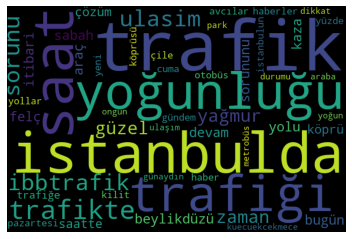

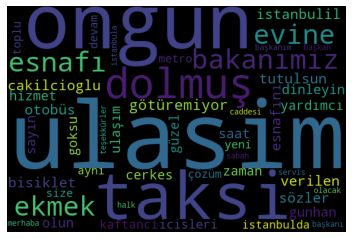

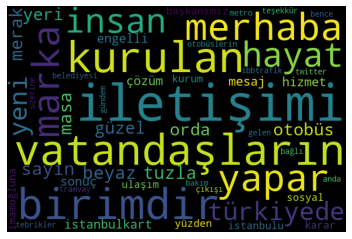

In [ ]:
for x in range(0, 3):
  draw_word_cloud(x)


lemma

In [ ]:

import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import spacy
import string

In [ ]:
eng_comments=reviews

In [ ]:
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()

In [ ]:
unlist_comments=df['cleaned_review']

In [ ]:
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(df['tokenized_texts'])
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(df['tokenized_texts'])

bigram

In [ ]:
bigram_freq = bigramFinder.ngram_fd.items()

In [ ]:
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

In [ ]:
bigramFreqTable.head().reset_index(drop=True)

,bigram,freq
0,(maltepe merhaba ulaşım desteği yetki alanımız...,30
1,(kiptaş genel müdürü kurt beşiktaş karanfilköy...,3
2,(ongun yazıklar yalan hemen soyluistifa soylua...,2
3,"(başkanı gündemdeki soruşturmalarla açıklama, ...",2
4,(aksener ustam imkanlarına çökmüş reklam bütçe...,1


In [ ]:
bigramFreqTable[:10]

,bigram,freq
1103,(maltepe merhaba ulaşım desteği yetki alanımız...,30
452,(kiptaş genel müdürü kurt beşiktaş karanfilköy...,3
5958,(ongun yazıklar yalan hemen soyluistifa soylua...,2
431,"(başkanı gündemdeki soruşturmalarla açıklama, ...",2
5313,(aksener ustam imkanlarına çökmüş reklam bütçe...,1
5309,(yolsuzluk teröristleri doldurmaktan yargılana...,1
5310,(devletin yanında olmayın size zamanında eziye...,1
5311,"(yapamıyor, telefon açıp yardım liler sevmiyor...",1
5312,(telefon açıp yardım liler sevmiyor yalvarmis ...,1
0,(dakikadan fazladır taksi dksı görünen otobüsü...,1


trigram

In [ ]:
trigram_freq = trigramFinder.ngram_fd.items()

In [ ]:
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [ ]:
trigramFreqTable.head().reset_index(drop=True)

,trigram,freq
0,(maltepe merhaba ulaşım desteği yetki alanımız...,24
1,(kiptaş genel müdürü kurt beşiktaş karanfilköy...,2
2,(dakikadan fazladır taksi dksı görünen otobüsü...,1
3,(kesinlikle haklı sayın erdoğan gençlerle bulu...,1
4,"(röportaj sonrası sahip çıktı, icisleri real g...",1


In [ ]:
trigramFreqTable[:10]

,trigram,freq
1105,(maltepe merhaba ulaşım desteği yetki alanımız...,24
453,(kiptaş genel müdürü kurt beşiktaş karanfilköy...,2
0,(dakikadan fazladır taksi dksı görünen otobüsü...,1
5327,(kesinlikle haklı sayın erdoğan gençlerle bulu...,1
5325,"(röportaj sonrası sahip çıktı, icisleri real g...",1
5324,(trol parçası seviyesiz ucube başkan dünyadaki...,1
5323,(mehmet kişi pkklı istanbulda yaşadığı yeri ça...,1
5322,(istanbula verdiği sözü tutsaydı halk sahip çı...,1
5321,(aksener ustam imkanlarına çökmüş reklam bütçe...,1
5320,(telefon açıp yardım liler sevmiyor yalvarmis ...,1
